In [55]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
from scipy import stats
import numpy as np
from sklearn import tree, base
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification, load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets, transforms
import pyfpgrowth
import torch

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
colors = ['blue','red','green','orange','magenta','black','cyan','purple']

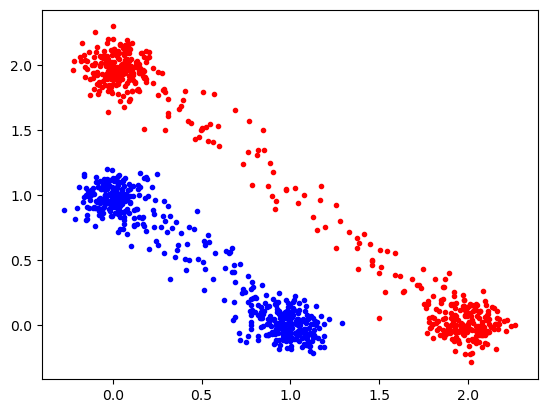

In [10]:
np.random.seed(0)
l = 500
x1 = np.random.dirichlet([1e-1,1e-1],size=l)\
    +1e-1*np.random.randn(l,2)
x2 = 2*np.random.dirichlet([1e-1,1e-1],size=l)\
    +1e-1*np.random.randn(l,2)
plt.plot(x1[:,0],x1[:,1],'.',color=colors[0])
plt.plot(x2[:,0],x2[:,1],'.',color=colors[1])
x = np.vstack([x1,x2])

D:\Installed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


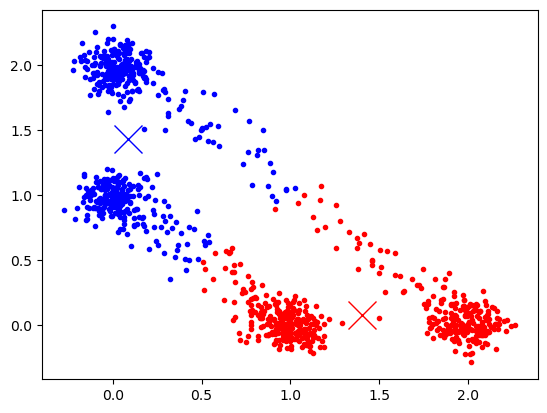

In [15]:
model = KMeans(n_clusters=2,random_state=42)
model.fit(x)
for i in np.unique(model.labels_):
    plt.plot(x[model.labels_ == i, 0],
             x[model.labels_ == i, 1], '.', color=colors[i])
    plt.plot([model.cluster_centers_[i][0]],
             [model.cluster_centers_[i][1]], 'x',
             c=colors[i],markersize=20)

D:\Installed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


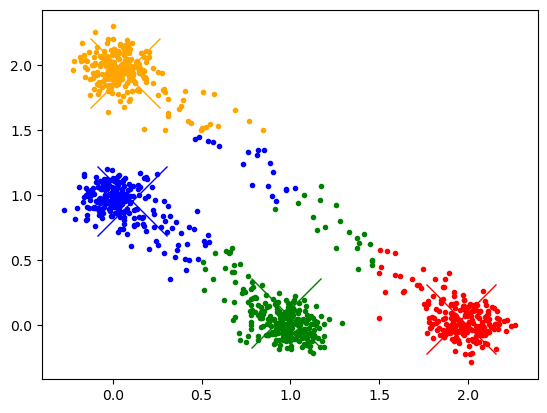

In [18]:
model = KMeans(n_clusters=4,random_state=42)
model.fit(x)
for i in np.unique(model.labels_):
    plt.plot(x[model.labels_ == i, 0],
             x[model.labels_ == i, 1], '.', color=colors[i])
    plt.plot([model.cluster_centers_[i][0]],
             [model.cluster_centers_[i][1]], 'x',
             c=colors[i],markersize=50)

4


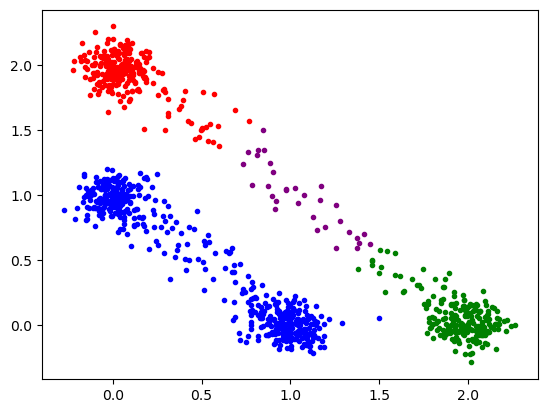

In [32]:
model = DBSCAN(0.3,min_samples=20, metric='minkowski', p=1)
model.fit(x)
print(len(np.unique(model.labels_)))
for i in np.unique(model.labels_):
    plt.plot(x[model.labels_ == i, 0],
             x[model.labels_ == i, 1], '.', color=colors[i])

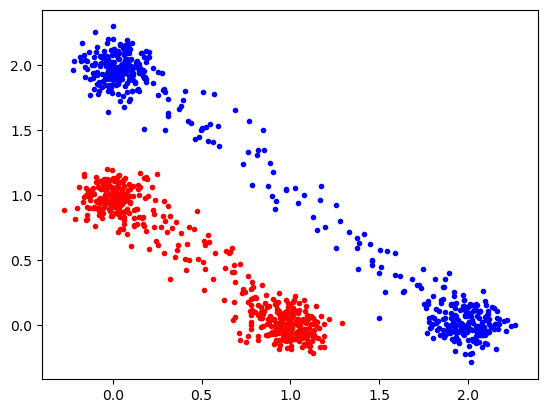

In [35]:
model = AgglomerativeClustering(n_clusters=2,metric='l1',
                               linkage='single')
model.fit(x)
for i in np.unique(model.labels_):
    plt.plot(x[model.labels_ == i, 0],
             x[model.labels_ == i, 1], '.', color=colors[i])

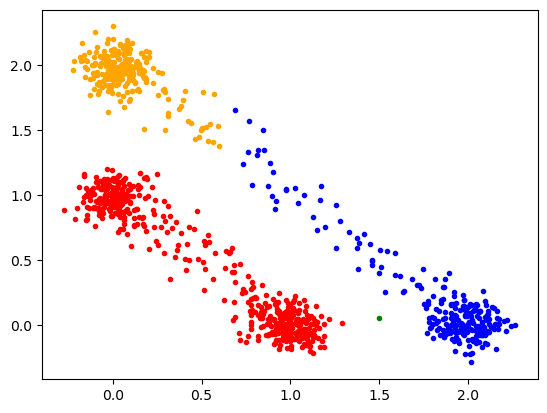

In [43]:
model = AgglomerativeClustering(distance_threshold=0.2,
                                n_clusters=None,
                                metric='l1',
                               linkage='single')
model.fit(x)
for i in np.unique(model.labels_):
    plt.plot(x[model.labels_ == i, 0],
             x[model.labels_ == i, 1], '.', color=colors[i])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [45.0, 45.0, 70.0, 70.0],
  [26.25, 26.25, 57.5, 57.5]],
 'dcoord': [[0.0, 0.13702746325005932, 0.13702746325005932, 0.0],
  [0.13702746325005932, 0.153640845035243, 0.153640845035243, 0.0],
  [0.153640845035243, 0.15682041440521166, 0.15682041440521166, 0.0],
  [0.0, 0.16486974008367783, 0.16486974008367783, 0.0],
  [0.0, 0.14256309206938017, 0.14256309206938017, 0.0],
  [0.16486974008367783,
   0.21295198904102153,
   0.21295198904102153,
   0.14256309206938017],
  [0.0, 0.23523354190359108, 0.23523354190359108, 0.21295198904102153],
  [0.15682041440521166,
   0.23913612665222048,
   0.23913612665222048,
   0.23523354190359108]],
 'ivl': ['(0)', '460', '301', '419', '866', '(0)', '(0)', '(0)', '(0)'],
 'leaves': [1976, 460, 301, 419, 866, 1991, 1994, 1957, 1981],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C3', 

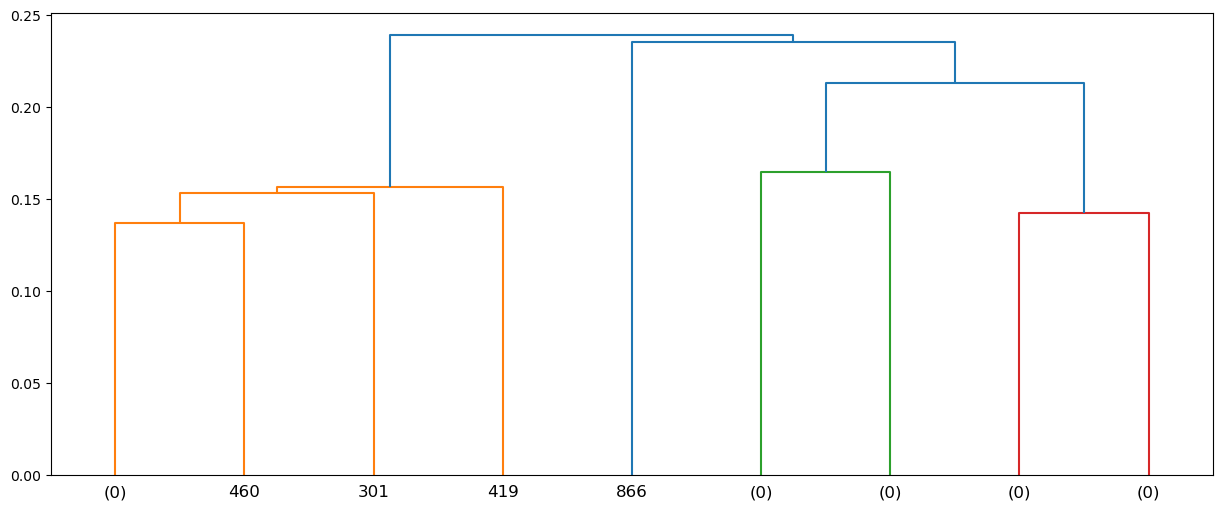

In [44]:
counts = np.zeros(model.children_.shape[0])
linkage_matrix = np.column_stack([model.children_,
                                  model.distances_,
                                 counts]).astype(float)
fig = plt.figure(figsize=(15,6))
dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [63]:
from sklearn.semi_supervised import LabelPropagation

label_prop_model = LabelPropagation()
iris = load_iris()
print(iris.target)
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(len(iris.target)) < 0.3
labels = np.copy(iris.target)
labels[random_unlabeled_points] = -1
print(labels)
label_prop_model.fit(iris.data, labels)
iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 0  0  0  0 -1 -1 -1  0  0  0 -1  0  0 -1 -1 -1  0  0  0 -1  0 -1 -1  0
  0  0 -1  0  0 -1  0 -1 -1  0  0  0  0 -1  0  0 -1  0 -1  0 -1  0  0  0
  0 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1  1 -1
 -1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1 -1 -1  2  2  2  2 -1  2  2 -1 -1 -1 -1  2  2  2  2  2 -1  2  2
  2  2  2 -1 -1  2  2  2 -1  2  2 -1 -1  2  2  2  2  2  2  2  2 -1  2  2
 -1 -1  2  2 -1 -1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])